In [59]:
import xradar as xr
import xradar as xd
import panel as pn

In [60]:

dirname = "/Users/brenda/data/for_mica/nexrad/output/20240510"
# SEA20220702_001310_ppi.nc	SEA20220702_003301_ppi.nc	SEA20220702_004910_ppi.nc
filename = "cfrad.20240510_010615.273_to_20240510_011309.471_KBBX_SUR.nc"
localfilename = dirname + "/" + filename
filename = localfilename
dtree = xd.io.open_cfradial1_datatree(filename)
# dtree = xd.io.backends.nexrad_level2.open_nexradlevel2_datatree(filename)
display(dtree)

DataTree('root', parent=None)
│   Dimensions:              (frequency: 1, sweep: 9)
│   Coordinates:
│     * frequency            (frequency) float32 4B 2.725e+09
│   Dimensions without coordinates: sweep
│   Data variables: (12/13)
│       volume_number        float64 8B ...
│       platform_type        |S32 32B ...
│       primary_axis         |S32 32B ...
│       status_str           |S1 1B ...
│       instrument_type      |S32 32B ...
│       time_coverage_start  |S32 32B ...
│       ...                   ...
│       latitude             float64 8B ...
│       longitude            float64 8B ...
│       altitude             float64 8B ...
│       altitude_agl         float64 8B ...
│       sweep_group_name     (sweep) <U10 360B 'sweep_0.0' ... 'sweep_11.0'
│       sweep_fixed_angle    (sweep) float32 36B ...
│   Attributes: (12/14)
│       Conventions:         CF-1.7
│       version:             CF-Radial-1.4
│       title:               
│       institution:         
│       references:          
│       source:              ARCHIVE 2 data
│       ...                  ...
│       instrument_name:     KBBX
│       site_name:           
│       scan_name:           Surveillance
│       scan_id:             35
│       platform_is_mobile:  false
│       ray_times_increase:  true
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_beam_width_v        float32 4B ...
│           radar_antenna_gain_h      float32 4B ...
│           radar_receiver_bandwidth  float32 4B ...
│           radar_beam_width_h        float32 4B ...
│           radar_antenna_gain_v      float32 4B ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/55)
│           time                      |S32 32B ...
│           pulse_width               timedelta64[ns] 8B ...
│           xmit_power_h              float32 4B ...
│           xmit_power_v              float32 4B ...
│           two_way_waveguide_loss_h  float32 4B ...
│           two_way_waveguide_loss_v  float32 4B ...
│           ...                        ...
│           zdr_correction            float32 4B ...
│           ldr_correction_h          float32 4B ...
│           ldr_correction_v          float32 4B ...
│           system_phidp              float32 4B ...
│           test_power_h              float32 4B ...
│           test_power_v              float32 4B ...
├── DataTree('georeferencing_correction')
├── DataTree('sweep_0')
│       Dimensions:                    (azimuth: 720, range: 1832)
│       Coordinates:
│           time                       (azimuth, range) datetime64[ns] 11MB 2024-05-1...
│         * range                      (range) float32 7kB 2.125e+03 ... 4.599e+05
│         * azimuth                    (azimuth) float32 3kB 0.2499 0.7581 ... 359.7
│           elevation                  (azimuth, range) float32 5MB 0.4834 ... 0.4834
│           latitude                   float64 8B ...
│           longitude                  float64 8B ...
│           altitude                   float64 8B ...
│       Data variables: (12/28)
│           sweep_number               float64 8B ...
│           sweep_mode                 <U20 80B 'azimuth_surveillance'
│           prt_mode                   |S32 32B ...
│           follow_mode                |S32 32B ...
│           sweep_fixed_angle          float32 4B ...
│           ray_n_gates                (azimuth) float64 6kB ...
│           ...                         ...
│           SW                         (azimuth, range) float32 5MB 4.5 nan ... nan nan
│           PHI                        (azimuth, range) float32 5MB 53.24 nan ... nan
│           REF                        (azimuth, range) float32 5MB 21.5 nan ... nan nan
│           RHO                        (azimuth, range) float32 5MB 0.9383 nan ... nan
│           CFP                        (azimuth, range) float32 5MB 24.0 73.0 ... nan
│           ZDR          

In [61]:
len(dtree.groups)

13

In [62]:
color_scale_base = "/Users/brenda/git/mica"
file_name = "x11_colors_map.txt"
conversion_file = color_scale_base + "/" + file_name
x11_color_name_map = {}  # it is a dictionary
# read the color name to hex conversion file
f = open(conversion_file, "r")
for line in f.readlines():
    x = line.split()
    x11_color_name_map[x[0]]=x[1]

print(x11_color_name_map["dodgerblue3"])

#1874cd


In [83]:
import matplotlib.colors as colors
from matplotlib.colors import to_rgb

color_scale_base = "/Users/brenda/git/lrose-displays/lrose-displays-master/color_scales"
file_name = "zdr_color"
color_scale_file = color_scale_base + "/" + file_name
color_names = []
edges = []
# read the color map file
f = open(color_scale_file, "r")
for line in f.readlines():
    if line[0] != '#':
        print(line)
        x = line.split()
        print(x)
        if len(x) == 3:
            color_names.append(x[2].lower())
            if len(edges) == 0:
                edges.append(float(x[0]))
            edges.append(float(x[1]))
# add the ending edge
display(color_names)
display(edges)
# convert the X11 color names to hex
color_scale_hex = []
for cname in color_names:
    if cname in x11_color_name_map:
        color_scale_hex.append(x11_color_name_map[cname]) 
    else:
        color_scale_hex.append(colors.to_hex(cname))
#colormap = colors.ListedColormap(color_, file_name)
#print(colormap)



[]


[]
-4	-3     DarkSlateBlue

['-4', '-3', 'DarkSlateBlue']
-3 	-2 	NavyBlue

['-3', '-2', 'NavyBlue']
-2	-1 	Blue

['-2', '-1', 'Blue']
-1 	0	MediumBlue

['-1', '0', 'MediumBlue']
0 	1 	SkyBlue

['0', '1', 'SkyBlue']
1 	2 	DarkGreen

['1', '2', 'DarkGreen']
2	3	ForestGreen

['2', '3', 'ForestGreen']
3 	4	YellowGreen

['3', '4', 'YellowGreen']
4	5	Gray

['4', '5', 'Gray']
5  	6 	Wheat

['5', '6', 'Wheat']
6  	7 	Gold

['6', '7', 'Gold']
7  	8 	Yellow

['7', '8', 'Yellow']
8	9	Coral

['8', '9', 'Coral']
9	10	Orange

['9', '10', 'Orange']
10	11	MediumVioletRed

['10', '11', 'MediumVioletRed']
11	12	OrangeRed

['11', '12', 'OrangeRed']
12	20	Red

['12', '20', 'Red']


[]


['darkslateblue',
 'navyblue',
 'blue',
 'mediumblue',
 'skyblue',
 'darkgreen',
 'forestgreen',
 'yellowgreen',
 'gray',
 'wheat',
 'gold',
 'yellow',
 'coral',
 'orange',
 'mediumvioletred',
 'orangered',
 'red']

[-4.0,
 -3.0,
 -2.0,
 -1.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 20.0]

In [109]:
nsteps = int(edges[-1] - edges[0] + 1)
new_edges = np.linspace(edges[0], edges[-1], nsteps)
print('new_edges = ', new_edges)
new_colors = []
for i in range(0, len(edges)-1):
    for ii in range(int(edges[i]), int(edges[i+1])):
        print(ii)
        new_colors.append(color_names[i])
    print("")
print("-----")
print(new_colors)
print("new_edges = ", len(new_edges), "new_colors = ", len(new_colors))
print("edges = ", len(edges), "colors = ", len(color_names))

new_edges =  [-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.
 14. 15. 16. 17. 18. 19. 20.]
-4

-3

-2

-1

0

1

2

3

4

5

6

7

8

9

10

11

12
13
14
15
16
17
18
19

-----
['darkslateblue', 'navyblue', 'blue', 'mediumblue', 'skyblue', 'darkgreen', 'forestgreen', 'yellowgreen', 'gray', 'wheat', 'gold', 'yellow', 'coral', 'orange', 'mediumvioletred', 'orangered', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
new_edges =  25 new_colors =  24
edges =  18 colors =  17


In [84]:
#help(colors.BoundaryNorm)
def normalize_colormap(edges, colors):
    #min = 1000
    #for i in edges:
    #    if i>0:
    #        diff = abs(edges[i] - edges[i-1])
    #        if diff < min:
    #            min = diff
    # TODO: use min
    nsteps = int(edges[-1] - edges[0] + 1)
    new_edges = np.linspace(edges[0], edges[-1], nsteps)
    c = 0
    j = 1
    for i in new_edges:
        if i < edges[j]:
            new_colors.append(colors[c])

for i in range
for i in range(edges[start], edges[e+1])

    

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            layout='constrained', squeeze=False)
    znorm = colors.BoundaryNorm(boundaries=edges, ncolors=len(color_scale_hex))
    znorm.autoscale(edges)
                               # vmin=edges[0], vmax=edges[len(edges)-1])
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, 
            # rasterized=True, 
            norm=znorm)
            # vmin=-4, vmax=4)
            
        fig.colorbar(psm, ax=ax)
    plt.show()

'#0000ff'

(0.09411764705882353, 0.4549019607843137, 0.803921568627451)

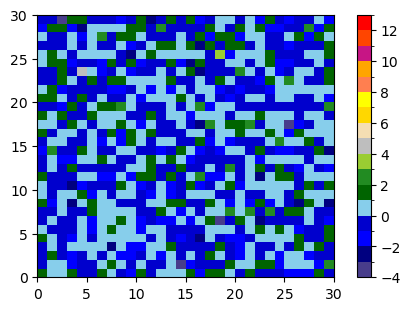

In [86]:

#cmap = colors.ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
# need some kind of X11 color converter ... maybe webcolors?
color_rgb = colors.to_hex("blue")
display(color_rgb)
try:
    color_rgb = colors.to_rgb("#1874cd") # ("dodgerblue3")
    display(color_rgb)
except ValueError as err:
    print(err)
    
cmap = colors.ListedColormap(color_scale_hex)
plot_examples([cmap])

In [ ]:
dtree

In [4]:
import numpy as np
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [5]:
sweeps = list(dtree.groups)
display(sweeps)
if len('/sweep'):
    print("not None")
else:
    print("None")

['/',
 '/radar_parameters',
 '/radar_calibration',
 '/georeferencing_correction',
 '/sweep_0',
 '/sweep_1',
 '/sweep_2',
 '/sweep_3',
 '/sweep_4',
 '/sweep_5',
 '/sweep_6',
 '/sweep_7',
 '/sweep_8']

not None


In [9]:
datatree = dtree
#def get_plot(field, datatree):
sweep = datatree['/sweep_0']
rvals = sweep.range.data
azvals = sweep.azimuth.data
display(azvals[:20])
# sort the azimuths in increasing order
# numpy.argsort(a, axis=-1, kind=None, order=None, *, stable=None)
index_array = np.argsort(azvals, stable=True)



array([0.24993896, 0.75805664, 1.2496948 , 1.7495728 , 2.2576904 ,
       2.7548218 , 3.2492065 , 3.746338  , 4.251709  , 4.751587  ,
       5.2542114 , 5.748596  , 6.2512207 , 6.748352  , 7.24823   ,
       7.753601  , 8.250732  , 8.75061   , 9.250488  , 9.753113  ],
      dtype=float32)

In [28]:
display(sweep)
print("ray gate spacing = ", sweep.ray_gate_spacing.data[0])
print("starting ray gate = ", sweep.ray_start_range.data[0])
print("ray ngates = ", sweep.ray_n_gates.data[0])
[name for name in datatree.groups
     if 'sweep' in name] 

DataTree('sweep_0', parent="root")
    Dimensions:                    (azimuth: 720, range: 1832)
    Coordinates:
        time                       (azimuth, range) datetime64[ns] 11MB 2024-05-1...
      * range                      (range) float32 7kB 2.125e+03 ... 4.599e+05
      * azimuth                    (azimuth) float32 3kB 0.2499 0.7581 ... 359.7
        elevation                  (azimuth, range) float32 5MB 0.4834 ... 0.4834
        latitude                   float64 8B ...
        longitude                  float64 8B ...
        altitude                   float64 8B ...
    Data variables: (12/28)
        sweep_number               float64 8B ...
        sweep_mode                 <U20 80B 'azimuth_surveillance'
        prt_mode                   |S32 32B ...
        follow_mode                |S32 32B ...
        sweep_fixed_angle          float32 4B ...
        ray_n_gates                (azimuth) float64 6kB ...
        ...                         ...
        SW                         (azimuth, range) float32 5MB 4.5 nan ... nan nan
        PHI                        (azimuth, range) float32 5MB 53.24 nan ... nan
        CFP                        (azimuth, range) float32 5MB 24.0 73.0 ... nan
        PURPLE_HAZE                (azimuth, range) float32 5MB nan nan ... nan nan
        RHO                        (azimuth, range) float32 5MB 0.9383 nan ... nan
        REF                        (azimuth, range) float32 5MB 21.5 nan ... nan nan

ray gate spacing =  250.0
starting ray gate =  2125.0
ray ngates =  1832.0


['/sweep_0',
 '/sweep_1',
 '/sweep_2',
 '/sweep_3',
 '/sweep_4',
 '/sweep_5',
 '/sweep_6',
 '/sweep_7',
 '/sweep_8']

In [39]:
def map_range_to_index(max_range, rvals, gate_spacing, start_range):
    print(gate_spacing, start_range)
    index = int((max_range - start_range)/gate_spacing)
    print("index = ", index)
    if index < 0:
        index = 0
    if index > len(rvals):
        index = len(rvals) - 1
    return index

In [40]:
max_range = 4000
rvals = sweep.range
map_range_to_index(max_range, rvals,
            sweep.ray_gate_spacing.data[0],
            sweep.ray_start_range.data[0])

250.0 2125.0
index =  7


7

In [15]:
for i in range(0,20):
    print("distance = ", azvals[i+1] - azvals[i])
myzeros = np.zeros((3, 5))
display(myzeros)
myzeros[2] = [1,2,3,4,5]
display(myzeros)

distance =  0.5081177
distance =  0.49163818
distance =  0.49987793
distance =  0.5081177
distance =  0.49713135
distance =  0.49438477
distance =  0.49713135
distance =  0.5053711
distance =  0.49987793
distance =  0.5026245
distance =  0.49438477
distance =  0.5026245
distance =  0.49713135
distance =  0.49987793
distance =  0.5053711
distance =  0.49713135
distance =  0.49987793
distance =  0.49987793
distance =  0.5026245
distance =  0.5026245


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 2., 3., 4., 5.]])

In [11]:
# apply sort index to data
# Array of indices that sort a along the specified axis. 
# If a is one-dimensional, a[index_array] yields a sorted a. 
# More generally, np.take_along_axis(a, index_array, axis=axis) always yields the sorted a,
# irrespective of dimensionality.
azvals_sorted = azvals[index_array]
print("azvals_sorted = ", azvals_sorted[:20])

myfieldname = 'ZDR'
fieldvar = sweep[myfieldname]
print("fieldvar unsorted = ", fieldvar[:5][:10])
field_var_sorted = fieldvar[index_array]
print("field_var_sorted = ", field_var_sorted[:5][:10])
print(field_data.shape)
print(rvals.shape)
print(azvals.shape)
display(sweep.ZDR.data)
print("numpy.ndarray shape: ", sweep.ZDR.data.shape, " ndim: ", sweep.ZDR.data.ndim)
# img = hv.Image(azvals, rvals, sweep.ZDR.data)
#d = np.array([[10, 10, 10], [20, 20, 20]])
print(type(field_data))

#ls = np.linspace(0, 20, 10)
#ls
#ls2 = np.linspace(0,5,2)

#img = hv.Image(sweep.ZDR)
#display(rvals)
#display(azvals)

azvals_sorted =  [0.24993896 0.75805664 1.2496948  1.7495728  2.2576904  2.7548218
 3.2492065  3.746338   4.251709   4.751587   5.2542114  5.748596
 6.2512207  6.748352   7.24823    7.753601   8.250732   8.75061
 9.250488   9.753113  ]
fieldvar unsorted =  <xarray.DataArray 'ZDR' (azimuth: 5, range: 1832)> Size: 37kB
array([[ 8.96875,      nan, -1.8125 , ...,      nan,      nan,      nan],
       [ 5.     ,  4.78125,  4.46875, ...,      nan,      nan,      nan],
       [ 0.46875,      nan,  0.40625, ...,      nan,      nan,      nan],
       [-0.9375 ,      nan,  1.96875, ...,      nan,      nan,      nan],
       [ 8.65625,      nan,  0.84375, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
    time       (azimuth, range) datetime64[ns] 73kB 2024-05-10T01:07:06.96500...
  * range      (range) float32 7kB 2.125e+03 2.375e+03 ... 4.596e+05 4.599e+05
  * azimuth    (azimuth) float32 20B 0.2499 0.7581 1.25 1.75 2.258
    elevation  (azimuth, range) float32 37kB 0.48

NameError: name 'field_data' is not defined

In [7]:
#ds = dtree.create_sweep_dataset()
display(dtree.groups)
sweep0 = dtree.get('sweep_0')
display(sweep0)
vel2 = sweep0.get('VEL2')  # this fetches a field / moment from the sweep
nrange = vel2.range.shape
naz = vel2.azimuth.shape
display(nrange, naz)
display(1197*360)
display(vel2)

('/',
 '/radar_parameters',
 '/georeferencing_correction',
 '/sweep_0',
 '/sweep_1',
 '/sweep_2',
 '/sweep_3',
 '/sweep_4',
 '/sweep_5',
 '/sweep_6',
 '/sweep_7',
 '/sweep_8',
 '/sweep_9',
 '/sweep_10',
 '/sweep_11')

DataTree('sweep_0', parent="root")
    Dimensions:            (azimuth: 360, range: 1197)
    Coordinates:
        time               (azimuth) datetime64[ns] 3kB 2022-07-02T00:13:24.78799...
      * range              (range) float32 5kB 400.0 500.0 ... 1.199e+05 1.2e+05
        elevation          (azimuth) float32 1kB ...
      * azimuth            (azimuth) float32 1kB 2.668e-08 1.013 ... 358.0 359.0
        latitude           float64 8B ...
        longitude          float64 8B ...
        altitude           float64 8B ...
    Data variables: (12/27)
        SDP                (azimuth, range) float32 2MB ...
        SQI2               (azimuth, range) float32 2MB ...
        DBZ2               (azimuth, range) float32 2MB ...
        FDP                (azimuth, range) float32 2MB ...
        WIDTH2             (azimuth, range) float32 2MB ...
        KDP                (azimuth, range) float32 2MB ...
        ...                 ...
        prt                (azimuth) timedelta64[ns] 3kB ...
        prt_ratio          (azimuth) float32 1kB ...
        prt_mode           |S32 32B ...
        nyquist_velocity   (azimuth) float32 1kB ...
        unambiguous_range  (azimuth) float32 1kB ...
        pulse_width        (azimuth) timedelta64[ns] 3kB ...

(1197,)

(360,)

430920

<xarray.DataArray 'VEL2' (azimuth: 360, range: 1197)> Size: 2MB
[430920 values with dtype=float32]
Coordinates:
    time       (azimuth) datetime64[ns] 3kB 2022-07-02T00:13:24.787999999 ......
  * range      (range) float32 5kB 400.0 500.0 600.0 ... 1.199e+05 1.2e+05
    elevation  (azimuth) float32 1kB ...
  * azimuth    (azimuth) float32 1kB 2.668e-08 1.013 2.01 ... 357.0 358.0 359.0
    latitude   float64 8B ...
    longitude  float64 8B ...
    altitude   float64 8B ...

In [87]:
sweep0.

NameError: name 'hv' is not defined

In [5]:
dtree.keys()

KeysView(DataTree('root', parent=None)
│   Dimensions:              (sweep: 12)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_group_name     (sweep) <U8 384B 'sweep_0' 'sweep_1' ... 'sweep_11'
│       sweep_fixed_angle    (sweep) float32 48B ...
│       latitude             float64 8B ...
│       longitude            float64 8B ...
│       altitude             float64 8B ...
│       time_coverage_start  |S32 32B ...
│       time_coverage_end    |S32 32B ...
│       volume_number        int32 4B ...
│   Attributes:
│       comment:          
│       title:            
│       Conventions:      CF/Radial instrument_parameters
│       source:           
│       version:          1.3
│       references:       
│       instrument_name:  SEAPOL
│       institution:      
│       history:          
├── DataTree('radar_parameters')
│       Dimensions:             ()
│       Data variables:
│           radar_beam_width_h  float32 4B ...
│           radar_beam_width

In [ ]:
field_widget = pn.widgets.Select(name="field momemt", value="VEL", options=list(data.columns))
window_widget = pn.widgets.IntSlider(name="window", value=30, start=1, end=60)
sigma_widget = pn.widgets.IntSlider(name="sigma", value=10, start=0, end=20)

In [47]:
help(dtree)

Help on DataTree in module datatree.datatree object:

class DataTree(datatree.treenode.NamedNode, datatree.ops.MappedDatasetMethodsMixin, datatree.ops.MappedDataWithCoords, datatree.ops.DataTreeArithmeticMixin, datatree.common.TreeAttrAccessMixin, collections.abc.Mapping, typing.Generic)
 |  DataTree(data: 'Optional[Dataset | DataArray]' = None, parent: 'Optional[DataTree]' = None, children: 'Optional[Mapping[str, DataTree]]' = None, name: 'Optional[str]' = None)
 |
 |  A tree-like hierarchical collection of xarray objects.
 |
 |  Attempts to present an API like that of xarray.Dataset, but methods are wrapped to also update all the tree's child nodes.
 |
 |  Method resolution order:
 |      DataTree
 |      datatree.treenode.NamedNode
 |      datatree.treenode.TreeNode
 |      datatree.ops.MappedDatasetMethodsMixin
 |      datatree.ops.MappedDataWithCoords
 |      datatree.ops.DataTreeArithmeticMixin
 |      datatree.common.TreeAttrAccessMixin
 |      collections.abc.Mapping
 |      ty